# K Nearest Neighbours

Objective: Predict diabetes patient  
Dataset: diabetes.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

0    500
1    268
Name: Outcome, dtype: int64


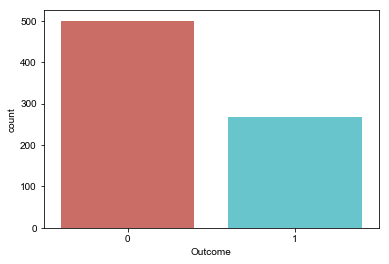

In [2]:
print(data['Outcome'].value_counts())

sns.countplot(x='Outcome',data = data, palette='hls',order = data['Outcome'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

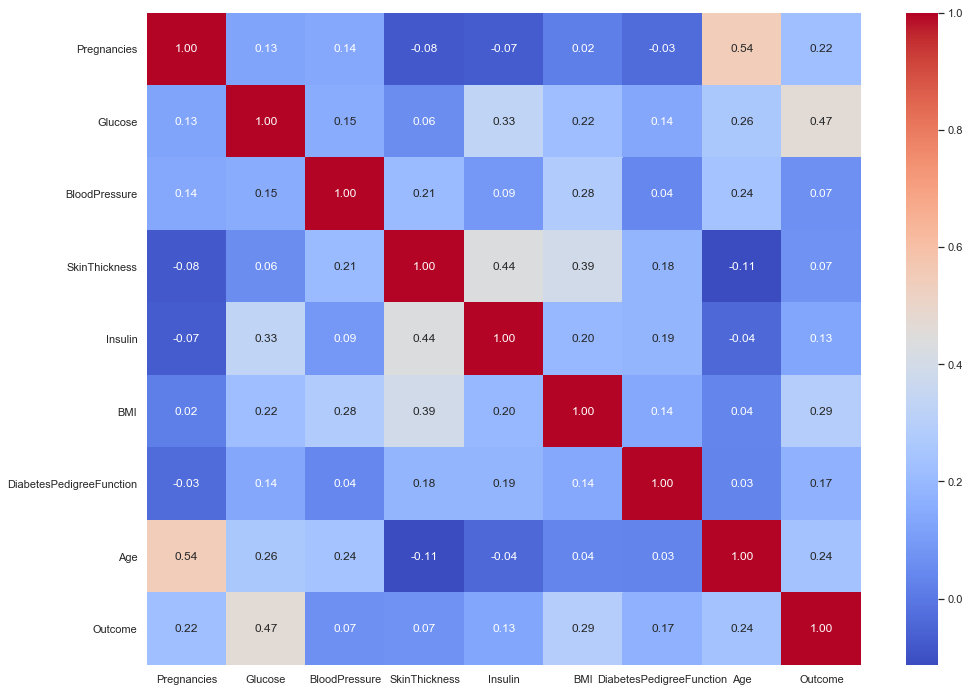

In [3]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [4]:
corr_rank = data.corr()
corr_rank["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Data Processing and Selection

In [5]:
X=data.iloc[:, :-1]
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [6]:
y = data["Outcome"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (768,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Data Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (768, 8)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191]])

## Split Train Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (614, 8) (614,)
X TEST Set :  (154, 8) (154,)


## K Nearest Neighbour

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#using loop to find the best accuracy and the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neighf = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neighf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(np.round(mean_acc,4))

[0.7078 0.7273 0.7208 0.7273 0.8052 0.7727 0.7987 0.7857 0.7857]


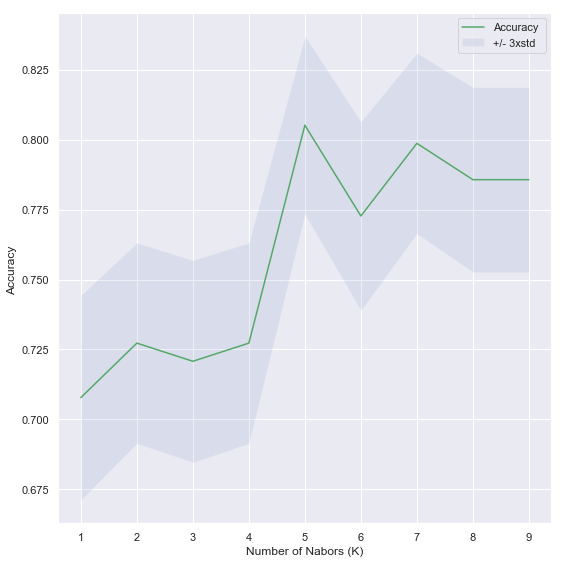

The best accuracy was 0.8052 with k= 5


In [10]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1) 

In [11]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

print("Train set Accuracy: ", round(metrics.accuracy_score(y_train, neigh.predict(X_train)),4))
print("Test set Accuracy : ", round(metrics.accuracy_score(y_test, yhat),4))

Train set Accuracy:  0.8192
Test set Accuracy :  0.8052


## Test Prediction

In [12]:
df_pred1 = data[data.index == 0]
df_pred2 = data[data.index == 1]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [13]:
Xp = df_pred.iloc[:, :-1]
yp = df_pred["Outcome"]
Xp = scaler.transform(Xp)

pred = neigh.predict(Xp)
pred

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 0], dtype=int64)